In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="API")
project = rf.workspace("anpr-ci0ri").project("dheeraj")
version = project.version(17)
dataset = version.download("yolov11")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 2.8 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to dheeraj-17 in yolov11:: 100%|██████████| 18788/18788 [00:02<00:00, 7761.10it/s] 


In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.4/898.4 kB 15.9 MB/s eta 0:00:00a 0:00:01


In [3]:
!yolo task=detect mode=train data=/kaggle/input/yaml-file/data.yaml model=yolov8n.pt epochs=70 batch=16 imgsz=640 lr0=0.001 optimizer=SGD \
workers=8 augment=True patience=10 device=0

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100%|██████████████████████████████████████| 6.25M/6.25M [00:00<00:00, 86.6MB/s]
Ultralytics 8.3.43 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/input/yaml-file/data.yaml, epochs=70, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True

In [6]:
!yolo task=detect mode=val model=/kaggle/working/runs/detect/train/weights/best.pt data=/kaggle/input/yaml-file/data.yaml

Ultralytics 8.3.43 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,012,668 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /kaggle/working/dheeraj-17/valid/labels.cache... 1836 images, 1 ba
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 4296, len(boxes) = 14780. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       1836      14780      0.968      0.946      0.976       0.77
                     0        679        892      0.972      0.965      0.987      0.762
                     1        607        765      0.967      0.905      0.966      0.678
                     2        544        637      0.978      0.965      0.983      0.758
                     3        546        669      

In [7]:
!yolo task=detect mode=predict model=/kaggle/working/runs/detect/train/weights/best.pt source=/kaggle/working/dheeraj-17/test/images

Ultralytics 8.3.43 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,012,668 parameters, 0 gradients, 8.1 GFLOPs

image 1/980 /kaggle/working/dheeraj-17/test/images/008_jpg.rf.bbb57a590cbdbbd07dd5d1402dab464d.jpg: 640x640 1 A, 1 D, 1 E, 1 H, 1 S, 1 T, 1 W, 1 Z, 8.9ms
image 2/980 /kaggle/working/dheeraj-17/test/images/012_jpg.rf.026bd533cc9960cfd8ad73b4c7c24379.jpg: 640x640 1 A, 1 C, 1 G, 1 H, 1 S, 1 T, 7.5ms
image 3/980 /kaggle/working/dheeraj-17/test/images/018_jpg.rf.db1939e4aa7ca09cafdeda2592611818.jpg: 640x640 1 A, 1 D, 1 G, 1 S, 1 T, 1 Z, 7.5ms
image 4/980 /kaggle/working/dheeraj-17/test/images/030_jpg.rf.92241ed2f92015721c9a0f5ab5c7d801.jpg: 640x640 1 A, 1 C, 1 D, 1 G, 1 H, 1 S, 1 T, 1 Z, 7.4ms
image 5/980 /kaggle/working/dheeraj-17/test/images/10_jpg.rf.5a88d6d9a169199398c401eecd489eba.jpg: 640x640 5 1s, 1 2, 2 5s, 2 9s, 1 A, 3 Ms, 7.4ms
image 6/980 /kaggle/working/dheeraj-17/test/images/14_jpg.rf.b4be9eb027bf7d169719cd1aa743564f.jpg: 

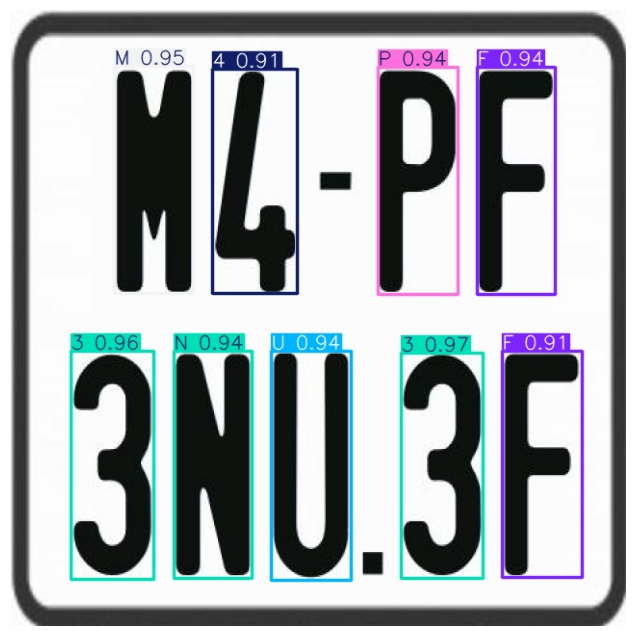

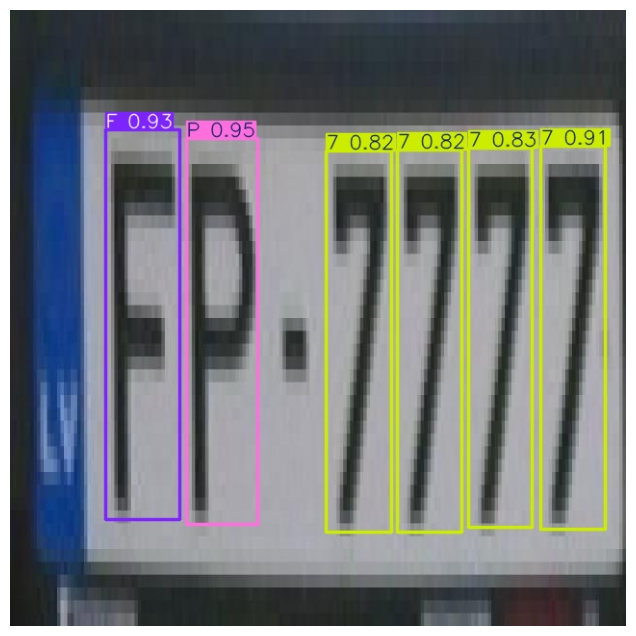

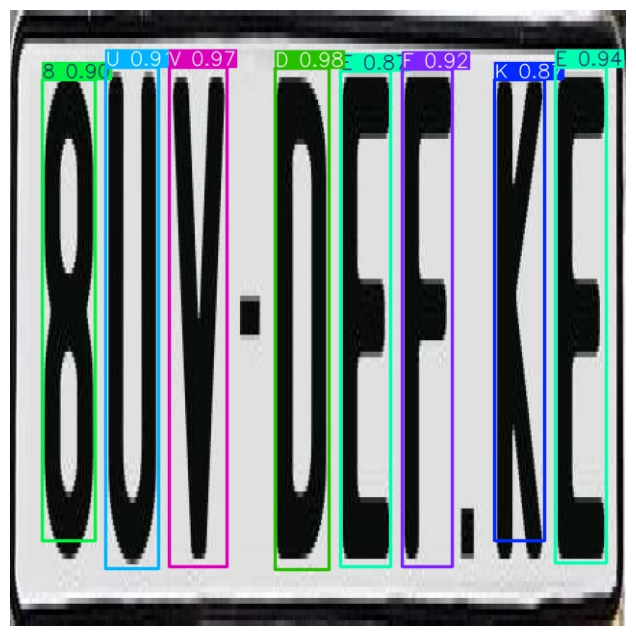

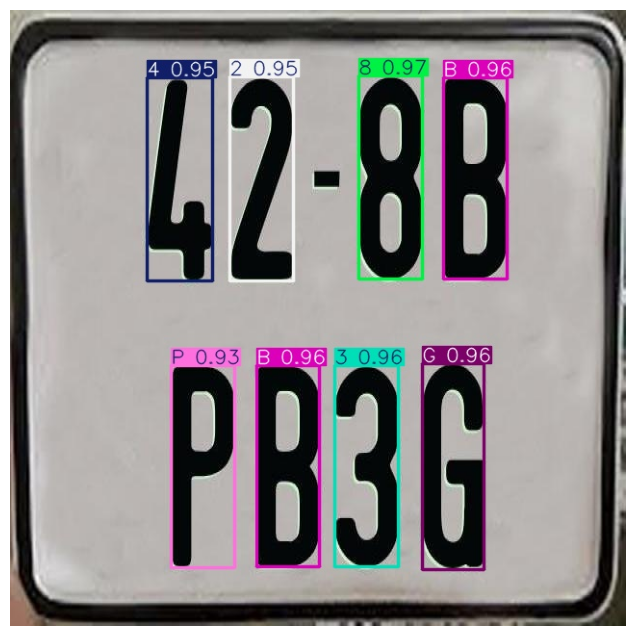

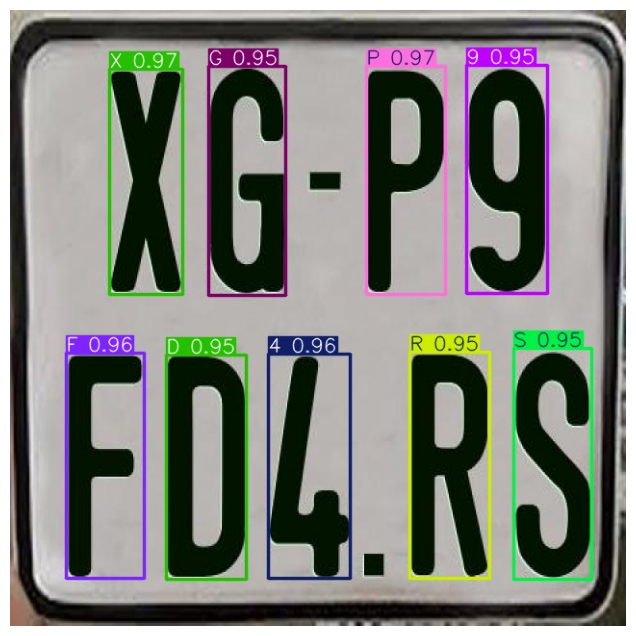

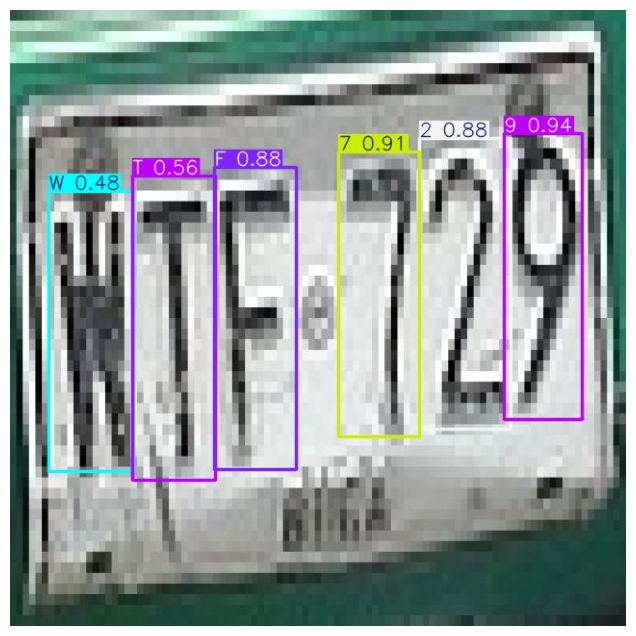

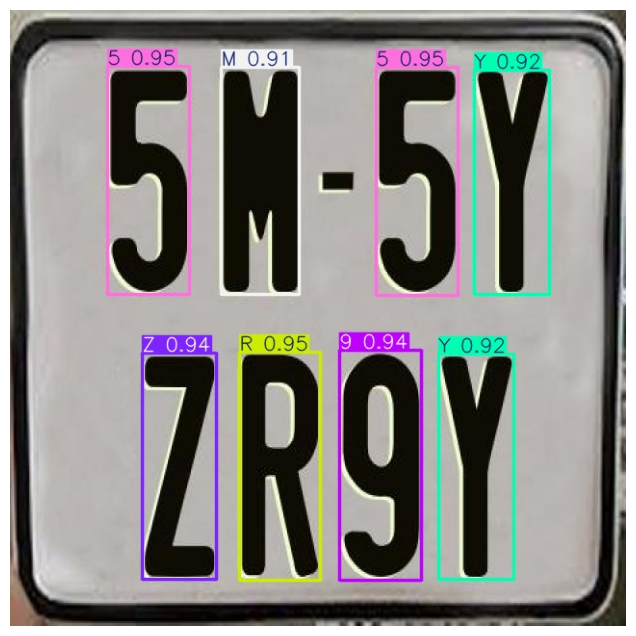

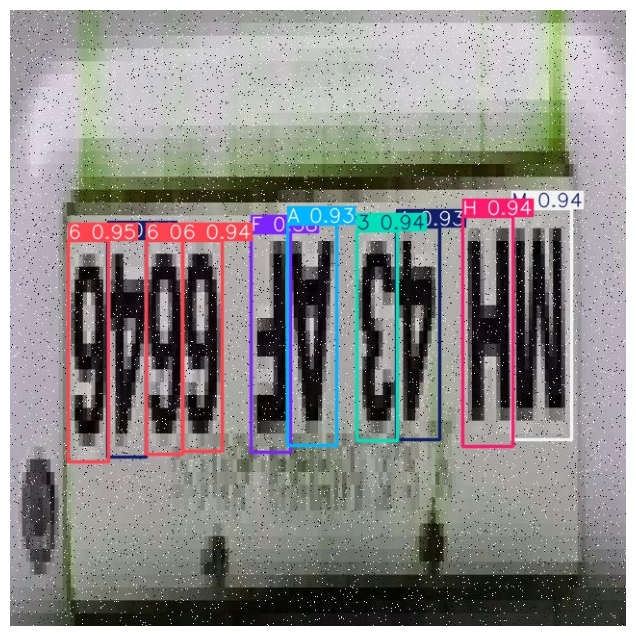

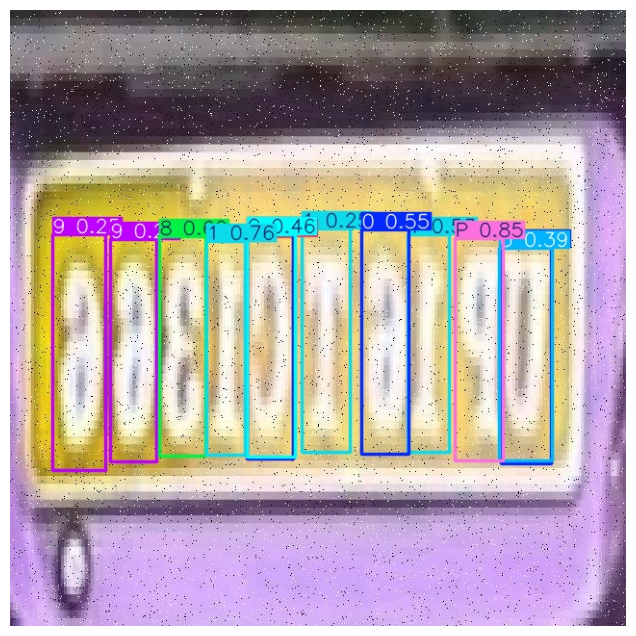

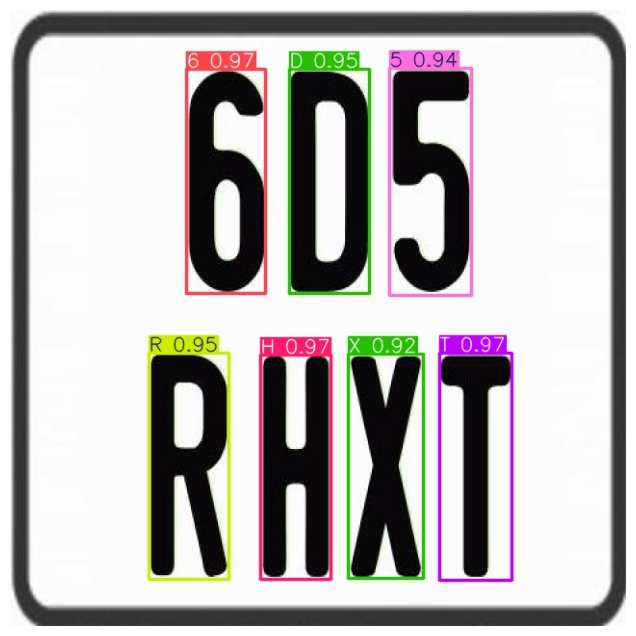

In [8]:
import cv2
import matplotlib.pyplot as plt
import glob

# Load predicted images
predicted_images = glob.glob('runs/detect/predict/*.jpg')

# Plot first 5 images
for img_path in predicted_images[:10]:
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for display
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [9]:
!pip install yt-dlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.1/172.1 kB 4.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 49.4 MB/s eta 0:00:00a 0:00:01


In [12]:
!yt-dlp -f best -o "input_video.mp4" "https://www.youtube.com/watch?v=LIR8eJp3jnk&ab_channel=BenRostami%28Securiguide%29"

         To let yt-dlp download and merge the best available formats, simply do not pass any format selection.
         If you know what you are doing and want only the best pre-merged format, use "-f b" instead to suppress this warning
[youtube] Extracting URL: https://www.youtube.com/watch?v=LIR8eJp3jnk&ab_channel=BenRostami%28Securiguide%29
[youtube] LIR8eJp3jnk: Downloading webpage
[youtube] LIR8eJp3jnk: Downloading ios player API JSON
[youtube] LIR8eJp3jnk: Downloading mweb player API JSON
[youtube] LIR8eJp3jnk: Downloading player 62ccfae7
[youtube] LIR8eJp3jnk: Downloading m3u8 information
[info] LIR8eJp3jnk: Downloading 1 format(s): 18
[download] Destination: input_video.mp4
[download] 100% of    1.29MiB in 00:00:00 at 2.00MiB/s0;33m00:000m


In [ ]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt source=input_video.mp4 conf=0.5

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 iou=0.6 source=input_video.mp4